<a href="https://colab.research.google.com/github/anggrainyshinta/newyorkcityairbnb/blob/main/New_York_City_Airbnb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Preparation

In [ ]:
# for basic data processing and graphical presentation
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

# for time series data processing
from datetime import datetime
from datetime import timedelta

# Raw Data Preparation

Converts a Google Sheet URL into a URL that can be used to read a CSV file

In [ ]:
# Open Google Sheet file
def data_fullset_url(url):
  data_url = 'https://drive.google.com/uc?id=' + url.split('/')[-2]
  return data_url

In [ ]:
#Reading Dataset
data_url = data_fullset_url('https://drive.google.com/file/d/1mH74Z3Jn4aLMbUjdAsSm4XP0FHg2ubmb/view?usp=sharing')
data = pd.read_csv(data_url)
data.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

# Data Cleaning

Deep dive into the dataset
* Handling missing data
* Handling typos values
* Handling duplicates
* Handling outliers
* String manipulation
* Timeseries manipulation

In [ ]:
data.columns

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365'],
      dtype='object')

## Handling typos values

In [ ]:
# Checking typos
check = ['neighbourhood_group','neighbourhood','room_type']

for i in check:
  unique_data = data[i].value_counts()
  print(unique_data,'\n')

Manhattan        21661
Brooklyn         20104
Queens            5666
Bronx             1091
Staten Island      373
Name: neighbourhood_group, dtype: int64 

Williamsburg          3920
Bedford-Stuyvesant    3714
Harlem                2658
Bushwick              2465
Upper West Side       1971
                      ... 
Fort Wadsworth           1
Richmondtown             1
New Dorp                 1
Rossville                1
Willowbrook              1
Name: neighbourhood, Length: 221, dtype: int64 

Entire home/apt    25409
Private room       22326
Shared room         1160
Name: room_type, dtype: int64 



## Handling duplicates

In [ ]:
data.duplicated().sum()

0

## Data Type

In [ ]:
# Convert neighbourhood_group, neighbourhood and room_type into string
data['neighbourhood_group'] = data['neighbourhood_group'].astype('category')
data['neighbourhood'] = data['neighbourhood'].astype('category')
data['room_type'] = data['room_type'].astype('category')

In [ ]:
# Convert last_review into datetime
data['last_review'] = pd.to_datetime(data['last_review'])
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   id                              48895 non-null  int64         
 1   name                            48879 non-null  object        
 2   host_id                         48895 non-null  int64         
 3   host_name                       48874 non-null  object        
 4   neighbourhood_group             48895 non-null  category      
 5   neighbourhood                   48895 non-null  category      
 6   latitude                        48895 non-null  float64       
 7   longitude                       48895 non-null  float64       
 8   room_type                       48895 non-null  category      
 9   price                           48895 non-null  int64         
 10  minimum_nights                  48895 non-null  int64         
 11  nu

## Handling missing data

In [ ]:
null_counts = data.isnull().sum()
print(null_counts)

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64


In [ ]:
def perc_missing(data):
    ''' Prints out columns with missing values with its percentages'''
    for col in data.columns:
        pct = data[col].isna().mean() * 100
        if (pct != 0):
            print('{} => {}%'.format(col, round(pct, 2)))

perc_missing(data)

name => 0.03%
host_name => 0.04%
last_review => 20.56%
reviews_per_month => 20.56%


In [ ]:
data.fillna({'name': 'None'}, inplace=True)
data.fillna({'host_name': 'None'}, inplace=True)
data.fillna({'reviews_per_month': 0}, inplace=True)

In [ ]:
data.drop(['id','last_review'], axis=1, inplace=True)
data.head()

,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,0.21,6,365
1,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,0.38,2,355
2,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,0.00,1,365
3,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,4.64,1,194
4,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,0.10,1,0


In [ ]:
null_counts = data.isnull().sum()
print(null_counts)

name                              0
host_id                           0
host_name                         0
neighbourhood_group               0
neighbourhood                     0
latitude                          0
longitude                         0
room_type                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
reviews_per_month                 0
calculated_host_listings_count    0
availability_365                  0
dtype: int64


In [ ]:
data.describe()

,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,4.889500e+04,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000
mean,6.762001e+07,40.728949,-73.952170,152.720687,7.029962,23.274466,1.090910,7.143982,112.781327
std,7.861097e+07,0.054530,0.046157,240.154170,20.510550,44.550582,1.597283,32.952519,131.622289
min,2.438000e+03,40.499790,-74.244420,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000
25%,7.822033e+06,40.690100,-73.983070,69.000000,1.000000,1.000000,0.040000,1.000000,0.000000
50%,3.079382e+07,40.723070,-73.955680,106.000000,3.000000,5.000000,0.370000,1.000000,45.000000
75%,1.074344e+08,40.763115,-73.936275,175.000000,5.000000,24.000000,1.580000,2.000000,227.000000
max,2.743213e+08,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


## Handling outliers

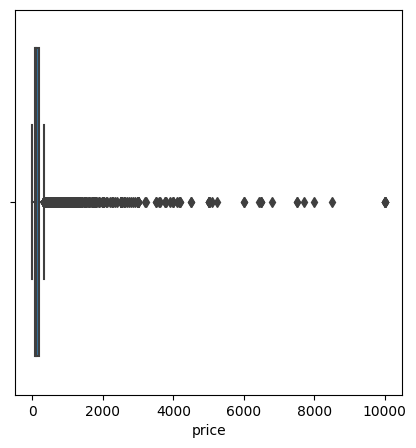

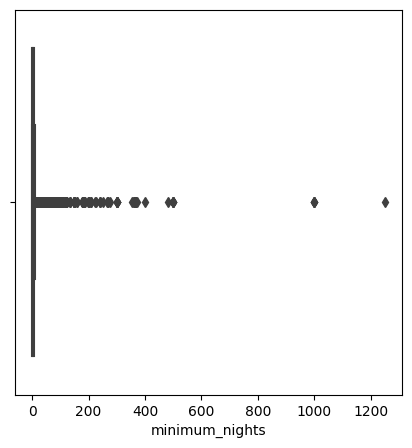

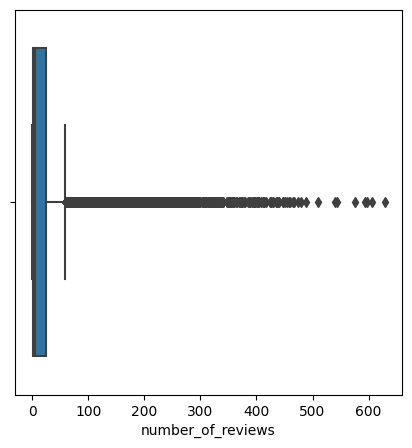

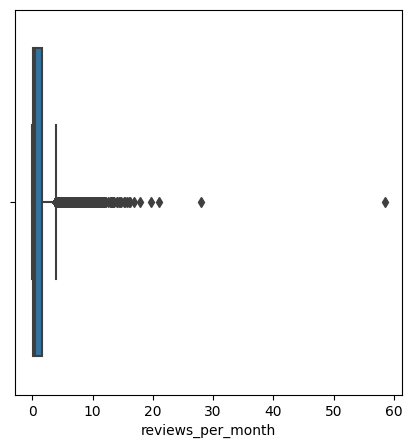

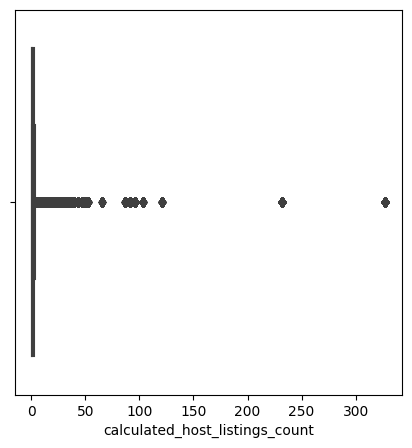

In [ ]:
# filter numeric column
numeric_column = ['price', 'minimum_nights', 'number_of_reviews',
    'reviews_per_month', 'calculated_host_listings_count']

for col in numeric_column:
    plt.figure(figsize=(5, 5))
    sns.boxplot(x=data[col])
    plt.show()

In [ ]:
def outliers_z_score(ys):
    threshold = 3

    mean_y = np.mean(ys)
    stdev_y = np.std(ys)
    z_scores = [(y - mean_y) / stdev_y for y in ys]
    return np.where(np.abs(z_scores) > threshold)

In [ ]:
for col in numeric_column:
    print(f'{col}: {len(outliers_z_score(data[col])[0])}')

price: 388
minimum_nights: 327
number_of_reviews: 1221
reviews_per_month: 847
calculated_host_listings_count: 680


In [ ]:
# Calculate z-scores for numeric columns
z_scores = np.abs(stats.zscore(data[numeric_column]))

# DataFrame without outliers
data_wo_outliers = data[(z_scores < 3).all(axis=1)]
data_wo_outliers.shape

(45640, 14)

In [ ]:
data_wo_outliers.head()

,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,0.21,6,365
1,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,0.38,2,355
2,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,0.00,1,365
4,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,0.10,1,0
5,Large Cozy 1 BR Apartment In Midtown East,7322,Chris,Manhattan,Murray Hill,40.74767,-73.97500,Entire home/apt,200,3,74,0.59,1,129


In [ ]:
data_wo_outliers.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 45640 entries, 0 to 48894
Data columns (total 14 columns):
 #   Column                          Non-Null Count  Dtype   
---  ------                          --------------  -----   
 0   name                            45640 non-null  object  
 1   host_id                         45640 non-null  int64   
 2   host_name                       45640 non-null  object  
 3   neighbourhood_group             45640 non-null  category
 4   neighbourhood                   45640 non-null  category
 5   latitude                        45640 non-null  float64 
 6   longitude                       45640 non-null  float64 
 7   room_type                       45640 non-null  category
 8   price                           45640 non-null  int64   
 9   minimum_nights                  45640 non-null  int64   
 10  number_of_reviews               45640 non-null  int64   
 11  reviews_per_month               45640 non-null  float64 
 12  calculated_host_li

# Download Data

In [ ]:
data_wo_outliers.to_csv('New York City Airbnb.csv')

In [ ]:
from google.colab import files

#data adalah nama dataframe yang ingin diunduh
data_wo_outliers.to_csv('New York City Airbnb.csv', index=False)

# unduh file
files.download('New York City Airbnb.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# Dashboard New York City Airbnb

https://public.tableau.com/views/NewYorkCityAirbnb_16856252766820/Dashboard1?:language=en-US&publish=yes&:display_count=n&:origin=viz_share_link&:device=desktop